In [2]:
#generic packages
import numpy as np
import pandas as pd
import os

#machine learning library
from sklearn.metrics import confusion_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn import datasets, metrics
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

#dimension reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

#Plotting Libraries
import seaborn as sn; sn.set(font_scale=1.4)
import matplotlib.pyplot as plt 

For this notebook, I decided to do unsupervised analysis on a wine tasting dataset.

I've always wondering if people who taste wines would cluster around certain characteristics of wines. In other words, if there is an objective "good" in wine tasting.

The dataset can be found here:
https://www.kaggle.com/maitree/wine-quality-selection

# Part 1: Dimensionality Reduction and visualizations

In this section, I tried PCA and UMAP to reduce dimensionality in the data.

In the end, UMAP was the better choice.

In [3]:
import os.path
from os import path

path.exists('/Users/ben/Documents/kaggle/winequality/winequality-red.csv')

True

In [4]:
#stick with red wines. Cause they're better.

df = pd.read_csv('/Users/ben/Documents/kaggle/winequality/winequality-red.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [20]:
df.iloc[:, :11]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
1594     10.5  
1595     11.2  
1596     11.0  
1597     10.2  
1598     11.0  

[1599 rows x 11 columns]

In [50]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [21]:
X = df.iloc[:, :11]
y = df['quality']

In [22]:
X = scaler.fit_transform(X)

In [24]:
#pca

Xt = X.T
Cx = np.cov(Xt)
print("Covariance matrix: {}".format(Cx))

Covariance matrix: [[ 1.00062578 -0.25629118  0.67212377  0.11484855  0.09376383 -0.15389043
  -0.11325227  0.66846534 -0.68340559  0.18312019 -0.06170686]
 [-0.25629118  1.00062578 -0.55284143  0.00191908  0.06133613 -0.0105104
   0.07651786  0.02204002  0.23508431 -0.26115001 -0.20241462]
 [ 0.67212377 -0.55284143  1.00062578  0.14366701  0.20395046 -0.06101629
   0.03555526  0.36517555 -0.54224326  0.31296577  0.10997202]
 [ 0.11484855  0.00191908  0.14366701  1.00062578  0.05564433  0.18716605
   0.20315493  0.3555057  -0.08570602  0.00553058  0.04210177]
 [ 0.09376383  0.06133613  0.20395046  0.05564433  1.00062578  0.00556563
   0.04743013  0.20075788 -0.26519198  0.37149281 -0.22127893]
 [-0.15389043 -0.0105104  -0.06101629  0.18716605  0.00556563  1.00062578
   0.66808426 -0.02195956  0.07042154  0.0516899  -0.06945179]
 [-0.11325227  0.07651786  0.03555526  0.20315493  0.04743013  0.66808426
   1.00062578  0.07131408 -0.06653617  0.04297371 -0.20578264]
 [ 0.66846534  0.022040

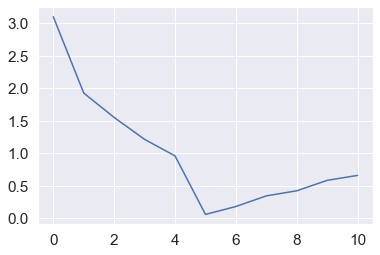

[3.10107182 1.92711489 1.55151379 1.21399175 0.95989238 0.05959558
 0.18144664 0.34485779 0.42322138 0.58415655 0.66002104]


In [25]:
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

plt.plot(eig_val_cov)
plt.show()

print(eig_val_cov)

Seems this needs about 4 principal components, but I'll stick with 2 because we've done it thus far.

In [33]:
pca = PCA(n_components = 2).fit_transform(X)

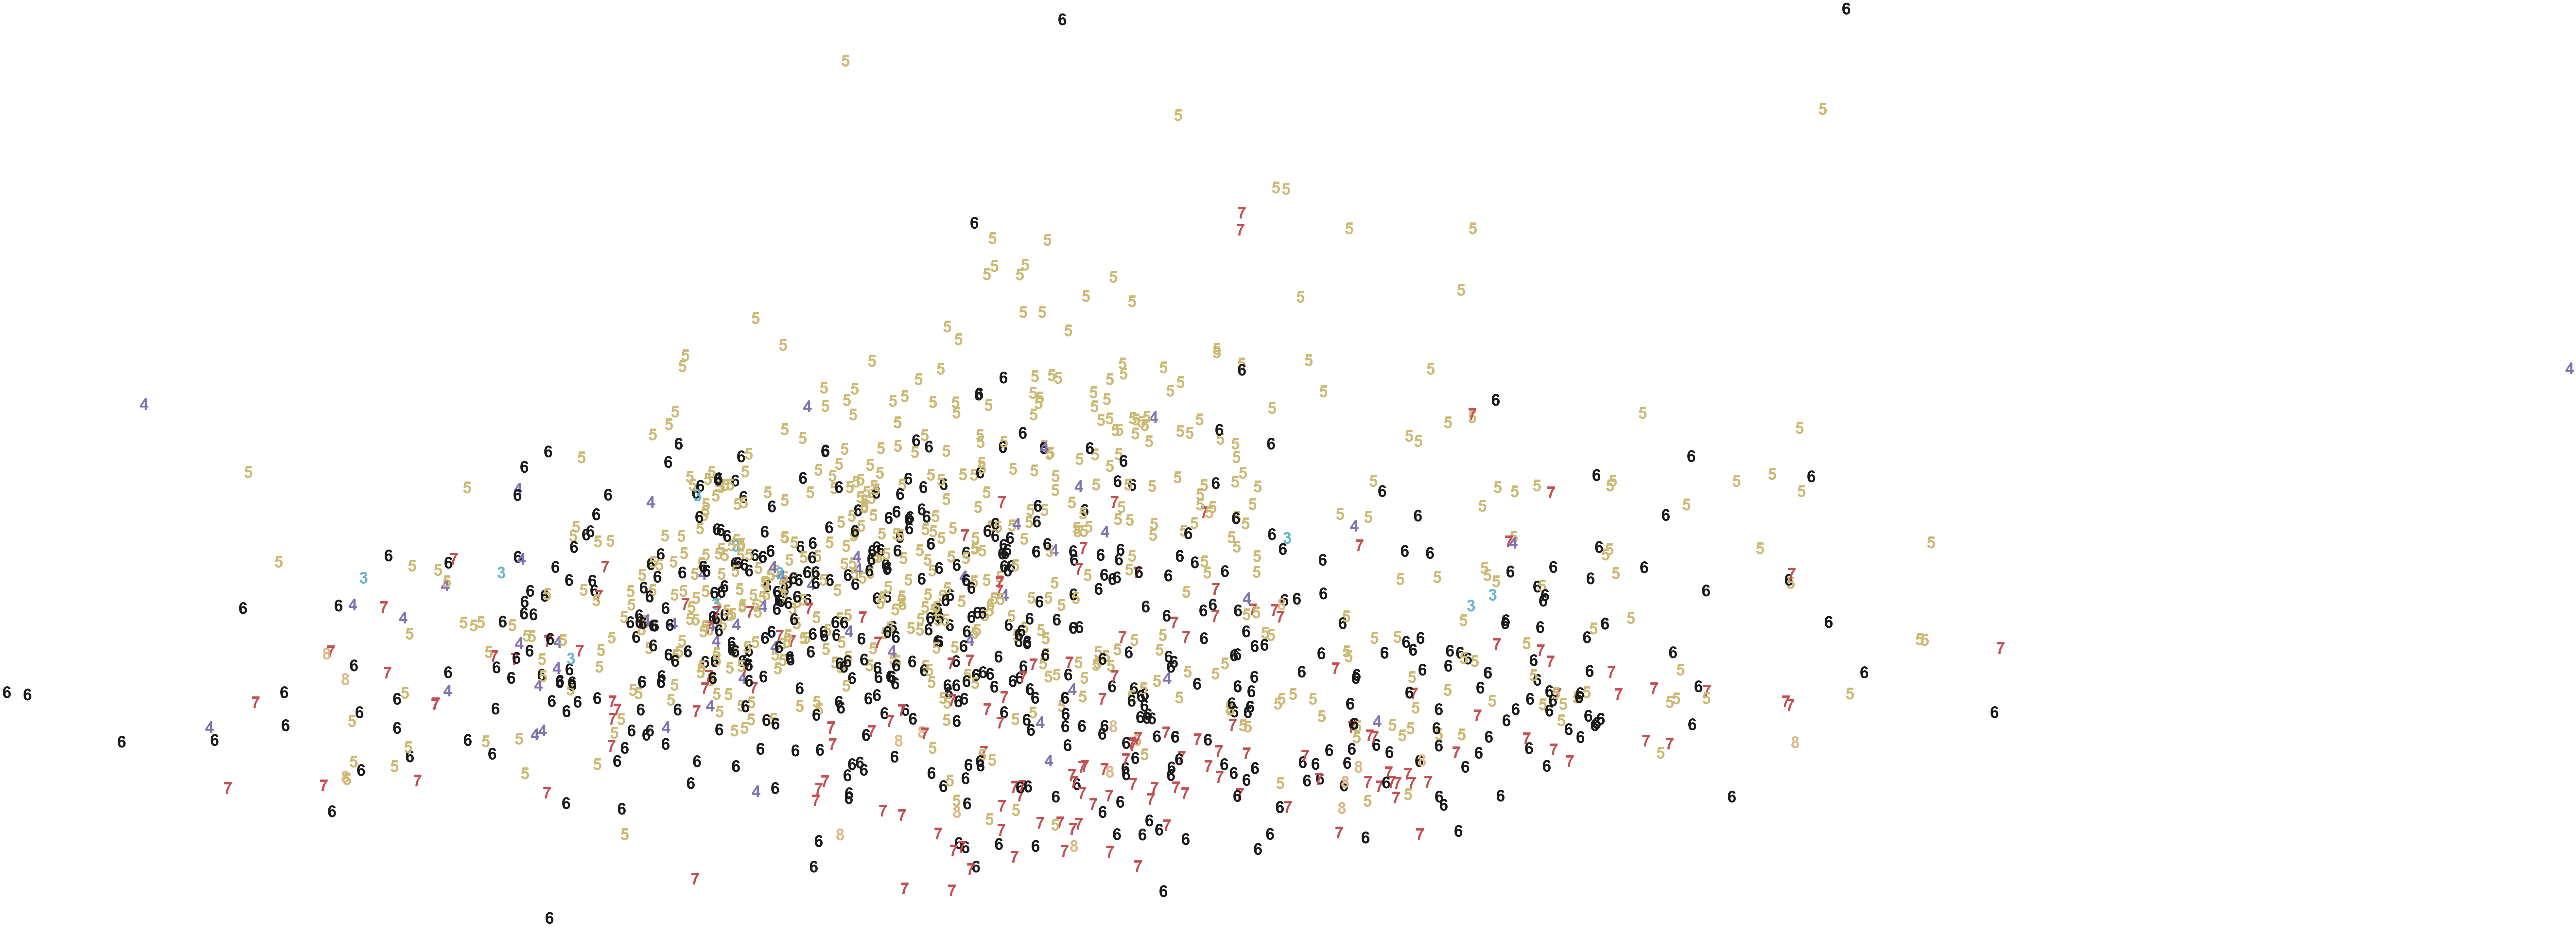

In [34]:
plt.figure(figsize=(10,5))

colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range (pca.shape[0]):
    plt.text(pca[i, 0],pca[i,1],str(y[i]),
    color = colours[int(y[i])],
    fontdict={'weight': 'bold', 'size': 50}
            )
    
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

I don't see any separation here. Will try another method.

In [38]:
import time

time_start = time.time()

umap_result = umap.UMAP(n_neighbors = 5,
                        min_dist = 0.5,
                        metric = 'correlation').fit_transform(X)

print('UMAP done. Time elapsed: {}'.format(time.time() - time_start))

UMAP done. Time elapsed: 3.4781479835510254


In [39]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(umap_result.shape[0]):
    plt.text(umap_result[i, 0], umap_result[i, 1], y[i],
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

This seems to have a certain amount more separation to it. 

There are definite clusters of black and what appear to be yellow near the bottom

However, it seems that, like wine-tasting in real life, a lot of the data is quite all over the place.

I will continue to use the umap_result for the rest of the clustering analysis.

# Part 2: Clustering Techniques

In this section, I used almost all the techniques we learned to measured clustering: Kmeans, DBScan, AgglomerativeClustering, and GMM.

Kmeans seems to do the best, but I'm sure I could achieve better results if I were to tune hyperparameters a bit more.

In [41]:
y_pred = KMeans(n_clusters = 2, random_state = 123).fit_predict(umap_result)

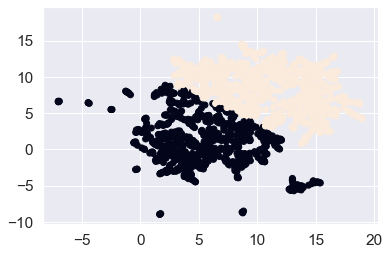

In [42]:
plt.scatter(umap_result[:, 0], umap_result[:, 1], c = y_pred)

In [44]:
print('KMeans ARI = {}'.format(metrics.adjusted_rand_score(y,y_pred)))
print('KMeans Silhouette = {}'.format(metrics.silhouette_score(umap_result, y_pred)))

KMeans ARI = 0.0777842835688649
KMeans Silhouette = 0.4007033109664917


Let's try looping through several possibilities of clusters and comparing their performance

/Users/ben/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:88: RuntimeWarning: divide by zero encountered in log
  n_local_trials = 2 + int(np.log(n_clusters))


n_clusters: {}, bad clustering


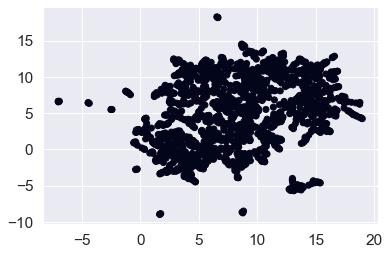

n_clusters: 1, KMeans ARI = 0.0
n_clusters: {}, bad clustering


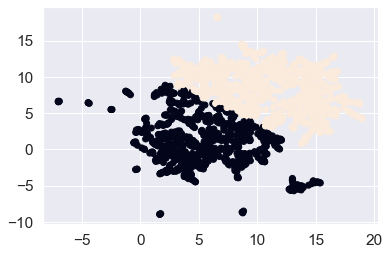

n_clusters: 2, KMeans ARI = 0.0777842835688649
KMeans Silhouette = 0.4007033109664917


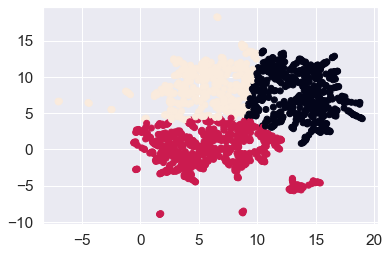

n_clusters: 3, KMeans ARI = 0.06890607351097311
KMeans Silhouette = 0.39560484886169434


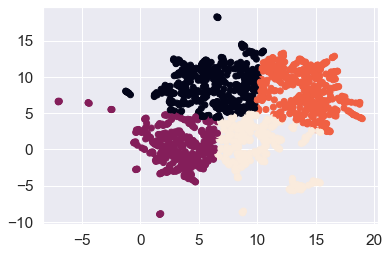

n_clusters: 4, KMeans ARI = 0.051605204030005056
KMeans Silhouette = 0.38325071334838867


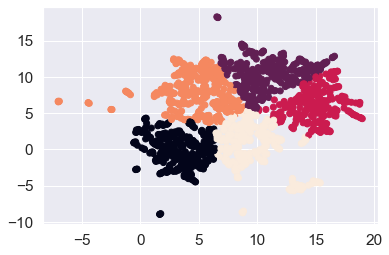

n_clusters: 5, KMeans ARI = 0.05188028078121695
KMeans Silhouette = 0.37418800592422485


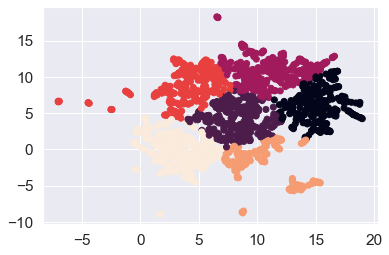

n_clusters: 6, KMeans ARI = 0.05218915346024598
KMeans Silhouette = 0.39768704771995544


In [59]:
for i in range (0, 7):
    try:
        y_pred = KMeans(n_clusters = i, random_state = 123).fit_predict(umap_result)
        plt.scatter(umap_result[:, 0], umap_result[:, 1], c = y_pred)
        plt.show()
        print('n_clusters: {}, KMeans ARI = {}'.format(i, metrics.adjusted_rand_score(y,y_pred)))
        print('KMeans Silhouette = {}'.format(metrics.silhouette_score(umap_result, y_pred)))
    except:
        print('n_clusters: {}, bad clustering')


Not the best performance from KMeans.

It seems that 2 clusters nets us the best performance, but there are many more than simply two quality ratings here.

We'll switch to DBSCAN next.


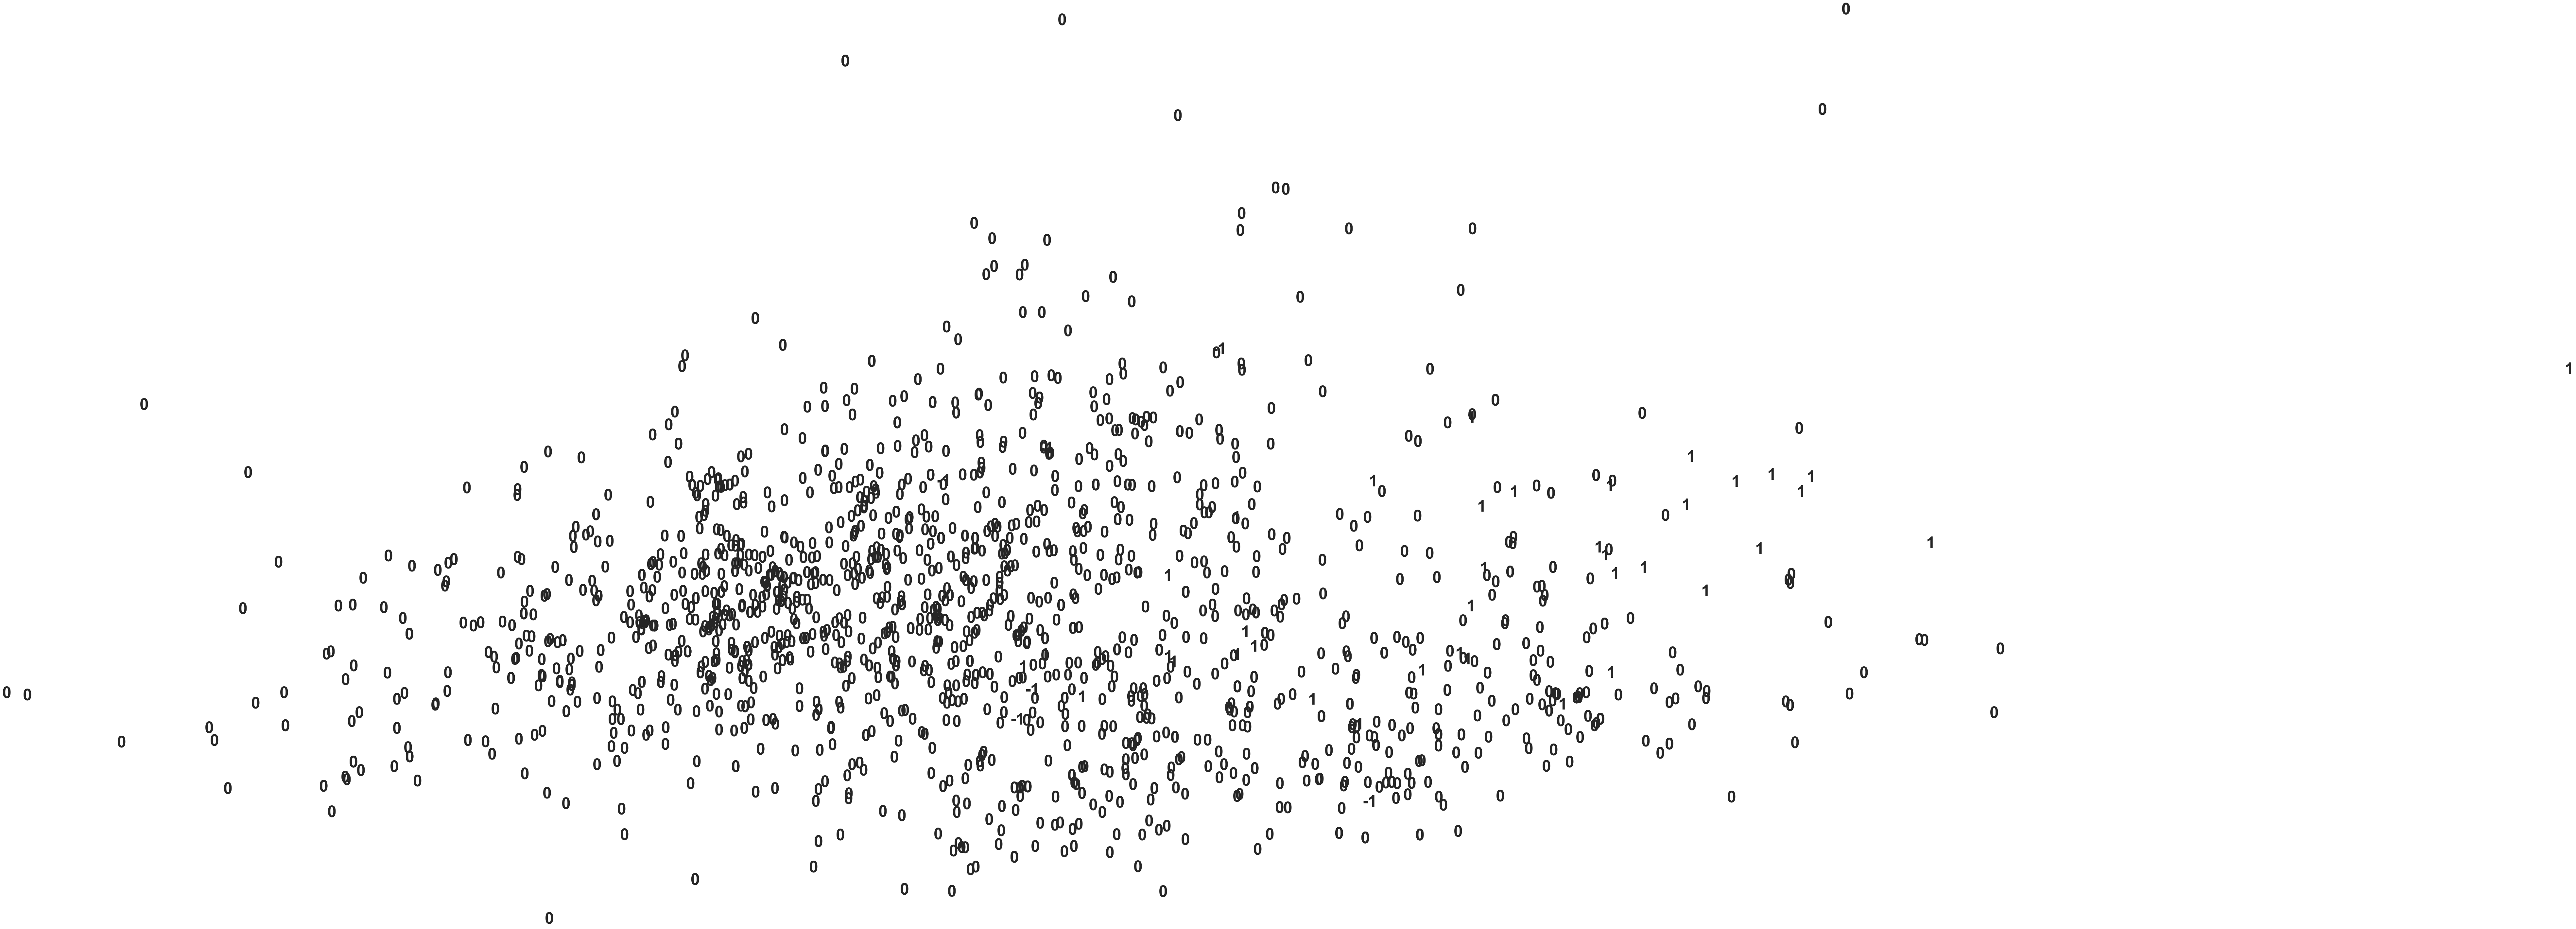

DBSCAN ARI = -0.007029891359241753
DBSCAN Silhouette = 0.30269625782966614


In [47]:
dbscan_cluster = DBSCAN(eps = 3, min_samples = 8)
clusters = dbscan_cluster.fit_predict(umap_result)

plt.figure(figsize=(10,5))
for i in range (pca.shape[0]):
    plt.text(pca[i,0], pca[i,1], str(clusters[i]),
            fontdict = {'weight': 'bold', 'size':50})

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

print('DBSCAN ARI = {}'.format(metrics.adjusted_rand_score(y,clusters)))
print('DBSCAN Silhouette = {}'.format(metrics.silhouette_score(umap_result, clusters)))

This is quite bad performance from DBSCAN

Next, moving onto Agglomerative Clustering

In [48]:
agg_cluster = AgglomerativeClustering(linkage = 'average',
                                     affinity = 'cosine',
                                     n_clusters = 2)

clusters = agg_cluster.fit_predict(umap_result)

print('ARI = {}'.format(metrics.adjusted_rand_score(y,clusters)))
print('Silhouette = {}'.format(metrics.silhouette_score(umap_result, clusters)))

ARI = -0.0019046317854937796
Silhouette = 0.32735005021095276


As there are 6 categories of quality, I'll try six clusters.

In [51]:
agg_cluster = AgglomerativeClustering(linkage = 'average',
                                     affinity = 'cosine',
                                     n_clusters = 6)

clusters = agg_cluster.fit_predict(umap_result)

print('ARI = {}'.format(metrics.adjusted_rand_score(y,clusters)))
print('Silhouette = {}'.format(metrics.silhouette_score(umap_result, clusters)))

ARI = -0.02007050839064118
Silhouette = 0.14098908007144928


As a whole, agglomerative clustering didn't do much either.

In [49]:
gmm_cluster = GaussianMixture(n_components = 2, covariance_type = 'spherical', random_state = 123)
clusters = gmm_cluster.fit_predict(umap_result)

print('ARI = {}'.format(metrics.adjusted_rand_score(y,clusters)))
print('Silhouette = {}'.format(metrics.silhouette_score(umap_result, clusters)))

ARI = 0.0761837739249518
Silhouette = 0.4000103175640106


In [57]:
for i in range(0, 7):
    try:
        gmm_cluster = GaussianMixture(n_components = i, covariance_type = 'spherical', random_state = 123)
        clusters = gmm_cluster.fit_predict(umap_result)
        print('n_component: {}, ARI score = {}'.format(i, metrics.adjusted_rand_score(y,clusters)))
        print('n_component: {}, Silhouette score = {}'.format(i, metrics.silhouette_score(umap_result, clusters)))
    except:
        print("n_component:  {}, Not a good cluster".format(i))

n_component:  0, Not a good cluster
n_component: 1, ARI score = 0.0
n_component:  1, Not a good cluster
n_component: 2, ARI score = 0.0761837739249518
n_component: 2, Silhouette score = 0.4000103175640106
n_component: 3, ARI score = 0.11944362961259977
n_component: 3, Silhouette score = 0.3711014986038208
n_component: 4, ARI score = 0.045509526875520394
n_component: 4, Silhouette score = 0.37735408544540405
n_component: 5, ARI score = 0.052519509765242514
n_component: 5, Silhouette score = 0.34657853841781616
n_component: 6, ARI score = 0.05359273762111981
n_component: 6, Silhouette score = 0.37108221650123596


Just from a quick analysis here, we can see that Kmeans seems to perform the best with GMM coming in close second.

Even though these performed the best, they didn't see to have that great of performance. This could possibly indicate the high personal preference and variance when it comes to individual wine tasting.

This isn't by any stretch of imagination a very comprehensive review. However, juding by the relatively low ARI and Silhouette scores, it seems quite difficult to pin cluster wine tastings. 

Also, it seems that hard clustering algorithms don't work very well with wine tastings. As I said above, that is most likely due to a high amount of personal preference and subjective tastes in wine tasting